### Import Required Libraries

In [1]:
import torch
from torch.utils.data import DataLoader, TensorDataset

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import numpy as np

### Load Data

In [2]:
X, y = load_wine(return_X_y=True)

Split Dataset

In [3]:
##Get indexes of the samples for each wine color
indices_color_0 = [i for i, label in enumerate(y) if label == 0]
indices_color_1 = [i for i, label in enumerate(y) if label == 1]
indices_color_2 = [i for i, label in enumerate(y) if label == 2]

##Split indexes for training and validation by wine color
train_indices_color_0, val_indices_color_0 = train_test_split(indices_color_0, test_size=0.2, random_state=21)
train_indices_color_1, val_indices_color_1 = train_test_split(indices_color_1, test_size=0.2, random_state=21)
train_indices_color_2, val_indices_color_2 = train_test_split(indices_color_2, test_size=0.2, random_state=21)

##Concatenate de indexes sets for global training and validation
train_indices = train_indices_color_0 + train_indices_color_1 + train_indices_color_2
val_indices = val_indices_color_0 + val_indices_color_1 + val_indices_color_2

##Get training and validation datasets
X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

### Model Fitting

In [4]:
torch.manual_seed(84)

##Hiperparameters
learning_rate = 0.01
n_epochs = 100

try:
    ##Data to Tensors
    X_train = torch.from_numpy(X_train.astype(np.float32))
    X_val = torch.from_numpy(X_val.astype(np.float32))
    y_train = torch.from_numpy(y_train.astype(np.int64))
    y_val = torch.from_numpy(y_val.astype(np.int64))

    ##Create DataLoader
    train_data = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
except:
    pass

##Define the Neural Network Topology
model = torch.nn.Sequential(
    torch.nn.Linear(13, 32),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(32, 3)
)

##Define Loss and Optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

##Training
train_losses = []
for epoch in range(n_epochs):
    epoch_loss = 0
    for i, (X_batch, y_batch) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))

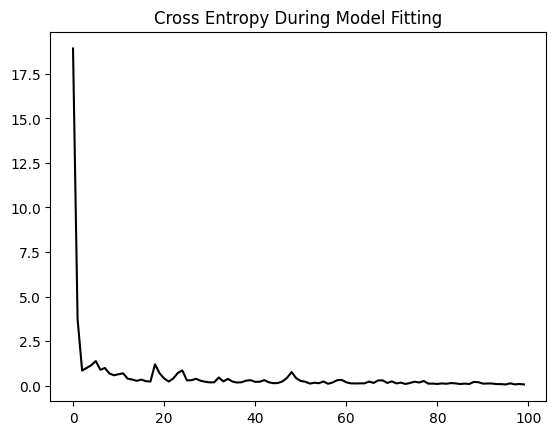

In [5]:
plt.plot(train_losses, 'k')
plt.title("Cross Entropy During Model Fitting")
plt.show()

Training Accuracy = 0.9716


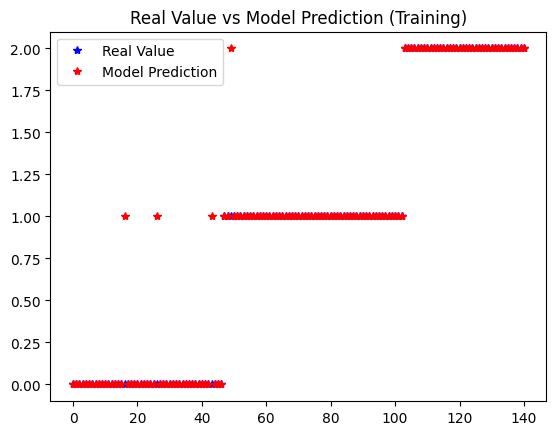

In [6]:
with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_train = torch.argmax(y_pred_train, dim=1)
    accuracy_train = (y_pred_train == y_train).sum().item() / len(y_train)
    print(f"Training Accuracy = {accuracy_train:.4f}")


with torch.no_grad():
    y_pred_train = model(X_train)
    y_pred_train = torch.argmax(y_pred_train, dim=1)
    plt.figure()
    plt.plot(y_train, '*b', label='Real Value')
    plt.plot(y_pred_train, '*r', label='Model Prediction')
    plt.legend(loc='best')
    plt.title("Real Value vs Model Prediction (Training)")
    plt.show()

### Model Validation

In [7]:
with torch.no_grad():
    y_pred_val = model(X_val)
    y_pred_val = torch.argmax(y_pred_val, dim=1)
    accuracy_val = (y_pred_val == y_val).sum().item() / len(y_val)
    print(f"Validation Accuracy = {accuracy_val:.4f}")

Validation Accuracy = 0.9189


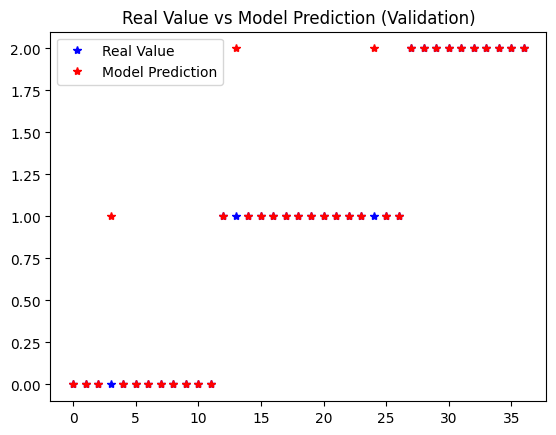

In [8]:
with torch.no_grad():
    y_pred_val = model(X_val)
    y_pred_val = torch.argmax(y_pred_val, dim=1)
    plt.figure()
    plt.plot(y_val, '*b', label='Real Value')
    plt.plot(y_pred_val, '*r', label='Model Prediction')
    plt.legend(loc='best')
    plt.title("Real Value vs Model Prediction (Validation)")
    plt.show()